<a href="https://colab.research.google.com/github/danbom/tensorflow/blob/master/Lab09_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 09 XOR - Logistic Regression 
- XOR 문제 Logistic Regression 으로 해결하기

기본 Library 선언

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)

In [ ]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0], x_data[0][1], c='pink', marker='^')
plt.scatter(x_data[3][0], x_data[3][1], c='pink', marker='^')
plt.scatter(x_data[1][0], x_data[1][1], c='skyblue', marker='^')
plt.scatter(x_data[2][0], x_data[2][1], c='skyblue', marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

XOR 처리 모델 만들기
- Tensorflow data API를 통해 학습시킬 값들을 담는다. (Batch Size는 한번에 학습시킬 Size로 정한다.)
- preprocess function 으로 features, labels 는 실재 학습에 쓰일 data 연산을 위해 integer -> float 으로 type를 맞춰준다.

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

1) Logistic Regression 으로 XOR 모델 만들기

- W = Weight / b = bias

In [ ]:
W = tf.Variable(tf.zeros((2,1)), name='weight')
b = tf.Variable(tf.zeros((1,)), name = 'bias')
print("W = {}, B = {}".format(W.numpy(), b.numpy()))

Sigmoid 함수를 가설로 선언
- Sigmoid 는 아래 그래프와 같이 0과 1의 값만 리턴 (tf.sigmoid(tf.matmul(X,W) + b)
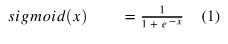

In [ ]:
def logistic_regression(features):
    hypothesis = tf.divide(1.,1.+tf.exp(tf.matmul(features,W)+b))
    return hypothesis

Cost 함수 정의

In [ ]:
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features))+(1-labels)*tf.math.log(1-hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

추론한 값은 0.5를 기준으로 0과 1의 값을 리턴
- Sigmoid 함수를 통해 예측값이 0.5보다 크면 1을 반환, 0.5보다 작으면 0을 반환

In [ ]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

GradientTape 를 통해 경사값 계산

In [ ]:
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features, labels)
    return tape.gradient(loss_value, [W,b])

실행
- 위의 Data를 Cost 함수를 통해 학습시킨 후 모델 생성

In [ ]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {: .4f}".format(step, loss_fn(logistic_regression(features), features, labels)))
print("W = {}, B = {}".format(W.numpy(), b.numpy()))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(logistic_regression(x_data),y_data)
print("Testset Accuracy: {: .4f}".format(test_acc))